In [72]:
import mat4py as mp
import numpy as np
# 载入必要库
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd
import networkx as nx  # 导入 NetworkX 工具包
 
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import Isomap

In [73]:
from sklearn.datasets import make_swiss_roll
# 用make_swiss_roll得到渐变色
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

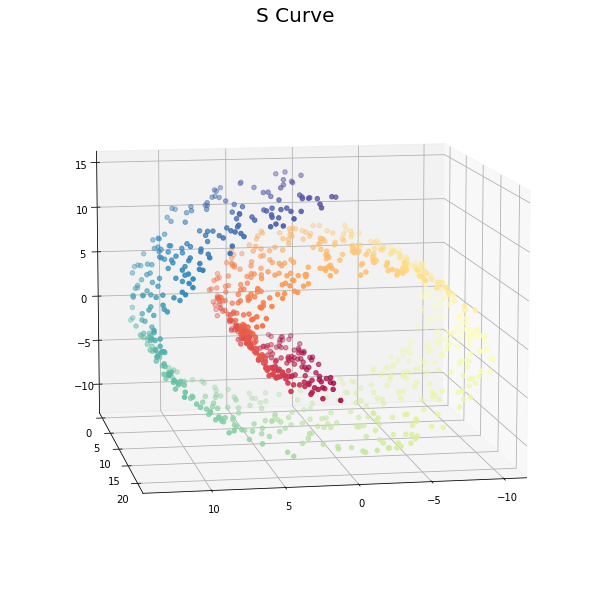

In [80]:
# 绘图
fig = plt.figure(figsize=(16, 8))
ax = Axes3D(fig, elev=10, azim=80, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title('S Curve', fontsize=20)
plt.show()

In [40]:
isomap = Isomap(n_components=2, n_neighbors=5)
data_2d = isomap.fit_transform(X)
dist_matrix = isomap.dist_matrix_

In [83]:
dfAdj = pd.DataFrame(dist_matrix)
G1 = nx.from_pandas_adjacency(dfAdj)  # 由 pandas 顶点邻接矩阵 创建 NetworkX 图
# 两个指定顶点之间的最短加权路径
minWPath = nx.bellman_ford_path(G1, source=250, target=520)  # 顶点 10 到 顶点 500 的最短加权路径
print("最短路径为：",minWPath)

最短路径为： [250, 39, 520]


In [84]:
def cedi_line(X):
    if len(X[0])==2:
        return [X[i,0] for i in minWPath], [X[i,1] for i in minWPath]
    if len(X[0])==3:
        return [X[i,0] for i in minWPath], [X[i,1] for i in minWPath], [X[i,2] for i in minWPath]

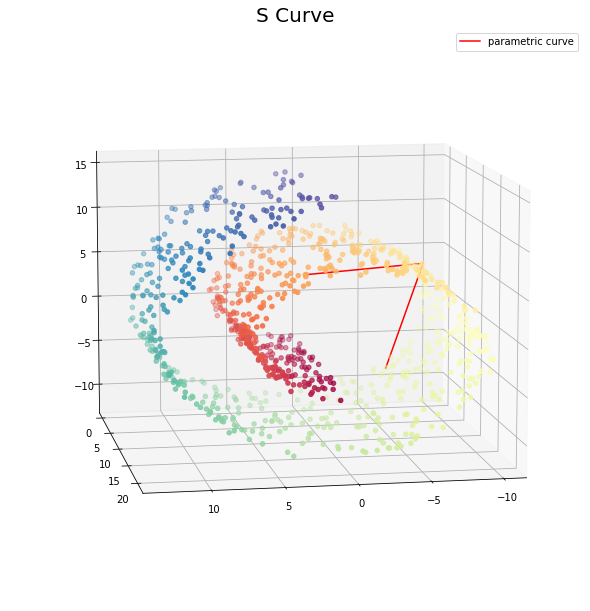

In [88]:
# 绘图
fig = plt.figure(figsize=(16, 8))
ax = Axes3D(fig, elev=10, azim=80, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title('S Curve', fontsize=20)

x,y,z=cedi_line(X)
ax.plot(x, y, z, label='parametric curve',color='red')
 
# 显示图例
ax.legend()
 
# 显示图形
plt.show()

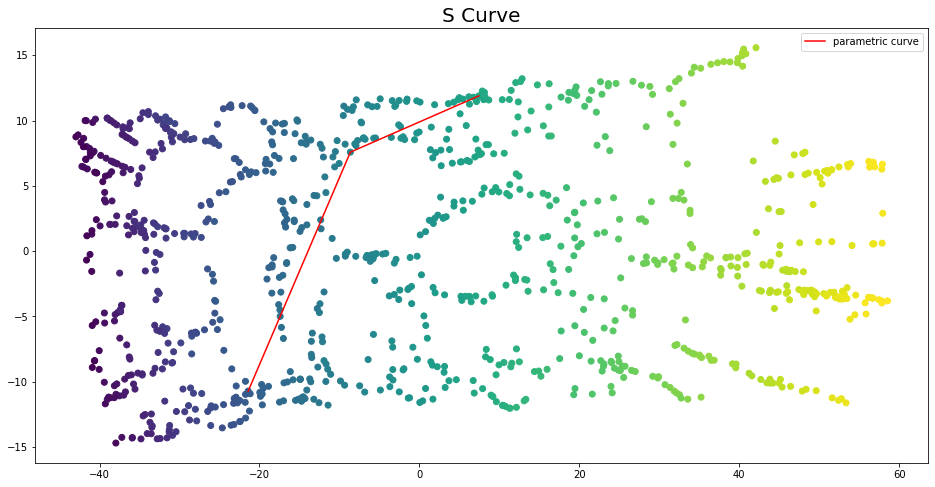

In [86]:
# 绘图
fig = plt.figure(figsize=(16, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=t)
plt.title('S Curve', fontsize=20)
 
x,y=cedi_line(data_2d)
plt.plot(x, y, label='parametric curve',color='red')

# 显示图例
plt.legend()
 
# 显示图形
plt.show()